<a href="https://colab.research.google.com/github/leeh8911/Deep_Learning_from_Scratch_Study/blob/master/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

import sys, os
os.chdir("/content/gdrive/My Drive/github/deep-learning-from-scratch/ch05")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

import numpy as np
import matplotlib.pylab as plt

print("env setting finished!")



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
env setting finished!


In [0]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            
            
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
                params[key] += self.v
                
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            
        for key, val in params.item():
            self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            slef.h[key] += grads[key]*grads[key]
            params[key] -= self.lr*grads[key]/np.sqrt(self.h[key] + 1e-7)
            
            
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



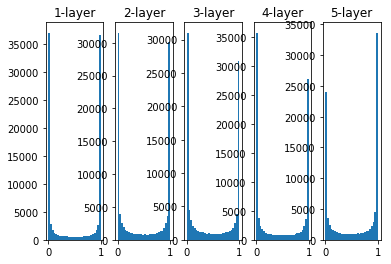

In [13]:
x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
    
plt.show()

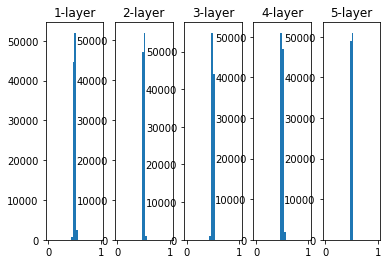

In [14]:

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
    
plt.show()